# Local fluctuations and flow at different time delay and segment length
We learned from the previous calculations that the divergence of cv is much larger than the convection term. However, the correlation between divergence of cv and LDF is small. The are two scenarios in which the low correlation can happen:

- there is a delay in the response of flow to concentration, or the opposite
- the segment length used in calculating LDF may be too short or too long

To test these two hypotheses, I did two sets of calculations:

1. Varying delay time between -500 and 500 frame and measure the flow-concentration correlation;
2. Varying segment length, compare the local_df field at each time point calculated from different segment lengths.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corrLib
from skimage import io
import os
from corr_utils import *
import time
from myImageLib import dirrec
from scipy.signal import savgol_filter
import typesetting.main as tm
tm.prl('1-column-2-panel')
import cv2
from miscLib import label_slope

## 1. Time delay
The response of concentration field to the flow field may not be instantaneous. If a short delay exists, the same time correlation could be small, while a different time correlation could be large. Here, I measure the correlation with different delay times and see if there is a universal law.
### 1.1 One frame correlation
Correlate divcn at 3000, with LDF ranging from 2500 to 3500 (33 seconds in total).

Text(0, 0.5, 'correlation')

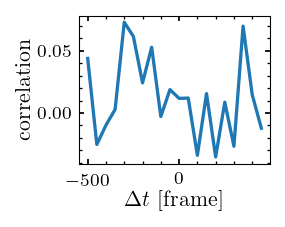

In [21]:
n = 3000
ranges = 500
divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\divcn\{0:04d}-{1:04d}.npy'.format(n, n+1))
corr_list = []
t_list = []
for i in range(n-ranges, n+ranges, 50):
    df = np.load(r'D:\density_fluctuations\08032020\local_df\01\{:04d}.npy'.format(i))
    corr = corr2d(divcn**2, df)
    corr_list.append(corr)
    t_list.append(i-n)
plt.plot(t_list, corr_list)
plt.xlabel('$\Delta t$ [frame]')
plt.ylabel('correlation')

### 1.2 Average over many frames
Average the delayed correlation over 2500-3000 frames. Plot correlation as a function of delay time $\Delta t$.

Text(0, 0.5, 'correlation')

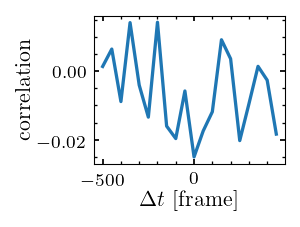

In [22]:
corr_list_n = []
t_list = range(-ranges, ranges, 50)
for n in range(2500, 3000, 50):
    divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\divcn\{0:04d}-{1:04d}.npy'.format(n, n+1))
    corr_list = []
    for i in range(n-ranges, n+ranges, 50):
        df = np.load(r'D:\density_fluctuations\08032020\local_df\01\{:04d}.npy'.format(i))
        corr = corr2d(divcn**2, df)
        corr_list.append(corr)
    corr_list_n.append(np.array(corr_list))
corr_final = np.stack(corr_list_n, axis=0).mean(axis=0)
plt.plot(t_list, corr_final)
plt.xlabel('$\Delta t$ [frame]')
plt.ylabel('correlation')

**Observation:** in sample 08032020/01, divcn shows a high correlation (0.05) when $\Delta t=-400$ frame. This means concentration fluctuations change first and then result in a flow field change. This does not make sense. So I try another sample 08032020/02.

Text(0, 0.5, 'correlation')

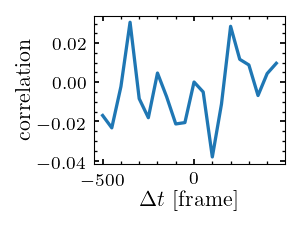

In [23]:
corr_list_n = []
t_list = range(-ranges, ranges, 50)
for n in range(2500, 3000, 50):
    divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs\02\divcn\{0:04d}-{1:04d}.npy'.format(n, n+1))
    corr_list = []
    for i in range(n-ranges, n+ranges, 50):
        df = np.load(r'D:\density_fluctuations\08032020\local_df\02\{:04d}.npy'.format(i))
        corr = corr2d(divcn**2, df)
        corr_list.append(corr)
    corr_list_n.append(np.array(corr_list))
corr_final = np.stack(corr_list_n, axis=0).mean(axis=0)
plt.plot(t_list, corr_final)
plt.xlabel('$\Delta t$ [frame]')
plt.ylabel('correlation')

**Observation:** in sample 08032020/02, high correlation do not show up at $\Delta t=-400$ frames. Instead, it is $\Delta t=-100$ frames. Let's try 08032020/00.

Text(0, 0.5, 'correlation')

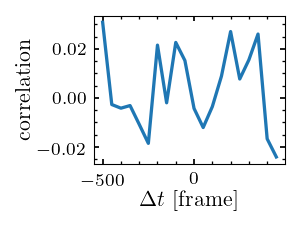

In [24]:
corr_list_n = []
t_list = range(-ranges, ranges, 50)
for n in range(2500, 3000, 50):
    divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs\00\divcn\{0:04d}-{1:04d}.npy'.format(n, n+1))
    corr_list = []
    for i in range(n-ranges, n+ranges, 50):
        df = np.load(r'D:\density_fluctuations\08032020\local_df\00\{:04d}.npy'.format(i))
        corr = corr2d(divcn**2, df)
        corr_list.append(corr)
    corr_list_n.append(np.array(corr_list))
corr_final = np.stack(corr_list_n, axis=0).mean(axis=0)
plt.plot(t_list, corr_final)
plt.xlabel('$\Delta t$ [frame]')
plt.ylabel('correlation')

**Observation:** in sample 08032020/00, the correlation is noisy over the whole range of $\Delta t$. No high correlation can be picked out.

### 1.3 Conclusion
Introducing delay time does NOT help in finding a high correlation between flow and concentration.

## 2. Segment length
Local density fluctuations (LDF) were calculated with segment length 50 frames in the past. The value was chosen arbitrarily and is not necessarily the best value. Here, by varying segment length, I can find out a proper range of segment length which gives stable LDF results.

### 2.1 Calculate LDF at various segment length


In [89]:
folder_80 = r'D:\density_fluctuations\08032020\02\8-bit'
for sl in range(10, 100, 10):
    print('80, sl={:02d}'.format(sl))
    df_80 = local_df(folder_80, seg_length=sl)
    save_folder = r'D:\density_fluctuations\08032020\local_df_{:02d}\02'.format(sl)
    if os.path.exists(save_folder) == False:
        os.makedirs(save_folder)
    for t, std in zip(df_80['t'], df_80['std']):
        np.save(os.path.join(save_folder, '{:04d}.npy'.format(t)), std)

80, sl=10
80, sl=20
80, sl=30
80, sl=40
80, sl=50
80, sl=60
80, sl=70
80, sl=80
80, sl=90


### 2.2 Correlation between LDF and divcn at various segment length
Calculate around frame 3000 +- 500.

Text(0, 0.5, 'correlation')

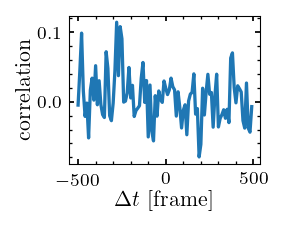

In [39]:
n = 3000
ranges = 500
seg_length = 10
divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\divcn\{0:04d}-{1:04d}.npy'.format(n, n+1))
corr_list = []
t_list = []
for i in range(n-ranges, n+ranges, seg_length):
    df = np.load(r'D:\density_fluctuations\08032020\local_df_{0:d}\01\{1:04d}.npy'.format(seg_length, i))
    corr = corr2d(divcn**2, df)
    corr_list.append(corr)
    t_list.append(i-n)
plt.plot(t_list, corr_list)
plt.xlabel('$\Delta t$ [frame]')
plt.ylabel('correlation')

Text(0, 0.5, 'correlation')

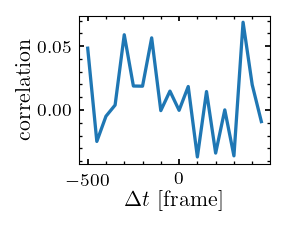

In [38]:
n = 3000
ranges = 500
seg_length = 50
divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\divcn\{0:04d}-{1:04d}.npy'.format(n, n+1))
corr_list = []
t_list = []
for i in range(n-ranges, n+ranges, seg_length):
    df = np.load(r'D:\density_fluctuations\08032020\local_df_{0:d}\01\{1:04d}.npy'.format(seg_length, i))
    corr = corr2d(divcn**2, df)
    corr_list.append(corr)
    t_list.append(i-n)
plt.plot(t_list, corr_list)
plt.xlabel('$\Delta t$ [frame]')
plt.ylabel('correlation')

Text(0, 0.5, 'correlation')

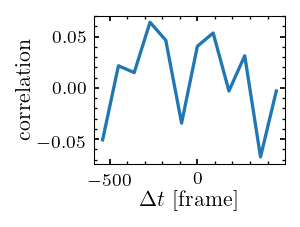

In [41]:
n = 2700
ranges = 540
seg_length = 90
divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\divcn\{0:04d}-{1:04d}.npy'.format(n, n+1))
corr_list = []
t_list = []
for i in range(n-ranges, n+ranges, seg_length):
    df = np.load(r'D:\density_fluctuations\08032020\local_df_{0:d}\01\{1:04d}.npy'.format(seg_length, i))
    corr = corr2d(divcn**2, df)
    corr_list.append(corr)
    t_list.append(i-n)
plt.plot(t_list, corr_list)
plt.xlabel('$\Delta t$ [frame]')
plt.ylabel('correlation')

In [11]:
# for different seg_length, frame numbers in local_df results are different.
# Here, we read the local_df data files first and get an array of frame numbers, then crop out the range of numbers we need.
l = corrLib.readdata(r'D:\density_fluctuations\08032020\local_df_{0:d}\01'.format(50), 'npy')
l.Name = l.Name.astype('int')
l.loc[l.Name>2500].head()

,Name,Dir
51,2550,D:\density_fluctuations\08032020\local_df_50\0...
52,2600,D:\density_fluctuations\08032020\local_df_50\0...
53,2650,D:\density_fluctuations\08032020\local_df_50\0...
54,2700,D:\density_fluctuations\08032020\local_df_50\0...
55,2750,D:\density_fluctuations\08032020\local_df_50\0...


Text(0.5, 1.0, 'frame 2100-3100')

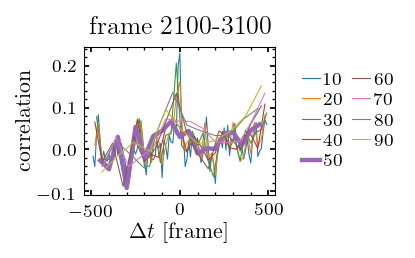

In [148]:
# Plot all correlation vs. dt on same axis
frame = 2600
ranges = 500
start = frame - ranges
end = frame + ranges

divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs\01\convection\{0:04d}-{1:04d}.npy'.format(frame, frame+1))
corr_list_sl = []
for sl in range(10, 100, 10):
    df_folder = r'D:\density_fluctuations\08032020\local_df_{:d}\01'.format(sl)
    l = corrLib.readdata(df_folder, 'npy')
    l.Name = l.Name.astype('int')
    l_crop = l.loc[(l.Name>start)&(l.Name<end)]
    corr_list = []
    for num, i in l_crop.iterrows():
        df = np.load(i.Dir)
        corr = corr2d(divcn**2, df)
        corr_list.append(corr)
    corr_list_sl.append(np.array(corr_list))
    if sl == 50:
        plt.plot(l_crop.Name-frame, corr_list, lw=2, label='{:d}'.format(sl))
    else:
        plt.plot(l_crop.Name-frame, corr_list, lw=.5, label='{:d}'.format(sl))
        
plt.legend(loc='right', ncol=2, bbox_to_anchor=(0.7, 0, 1, 1))
plt.xlabel('$\Delta t$ [frame]')
plt.ylabel('correlation')
plt.title('frame {0:d}-{1:d}'.format(start, end), fontfamily='sans-serif')

In [136]:
corr_list_sl

[array([-0.04099962, -0.04884046, -0.05115973,  0.06413835,  0.07800016,
        -0.01612123, -0.01393515, -0.011033  , -0.00560024, -0.03891337,
        -0.02544271,  0.01099962, -0.05723874, -0.059778  , -0.05348518,
         0.00553785, -0.01133146, -0.04827327, -0.06303669, -0.10010838,
         0.02147614, -0.00193445, -0.06075093, -0.0339531 , -0.07574132,
        -0.0422167 ,  0.00290445,  0.02014449, -0.04043574, -0.02052919,
        -0.04636364, -0.1001209 , -0.07775085, -0.04589135, -0.03001188,
        -0.02778581,  0.00170034,  0.00570426, -0.01968747, -0.00784553,
         0.02506462, -0.02865592, -0.01503378,  0.03234347, -0.00072609,
        -0.07284429, -0.00425097,  0.04188811,  0.17748162,  0.10157872,
         0.00172538,  0.00676984, -0.00290672,  0.0668794 ,  0.03072285,
         0.09204922,  0.15962911,  0.07059962, -0.01667233,  0.01992558,
        -0.04002776, -0.02021861,  0.05183673,  0.04771887,  0.01671771,
         0.10820461,  0.00944497,  0.01672797, -0.0

### 2.3 Conclusion
- Changing segment length from 10 to 90 does not change the correlation between divcn and local number fluctuations substantially
- between frame 2500 and frame 3000, I observe a high correlation at $\Delta t\approx -250$

## 3. Convection and LDF, segment length is 10 frames

0.006619596047460597

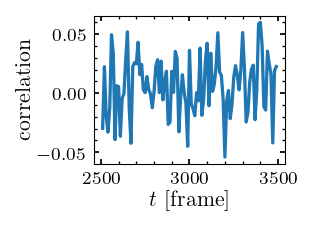

In [167]:
# Plot all correlation vs. dt on same axis
frame = 3000
ranges = 500
start = frame - ranges
end = frame + ranges


df_folder = r'D:\density_fluctuations\08032020\local_df\09\dt={:d}'.format(10)

l = corrLib.readdata(df_folder, 'npy')
l.Name = l.Name.astype('int')
l_crop = l.loc[(l.Name>start)&(l.Name<end)]
corr_list = []
for num, i in l_crop.iterrows():
    conv = np.load(r'D:\density_fluctuations\08032020\flow_derivs\09\convection\{0:04d}-{1:04d}.npy'.format(i.Name, i.Name+1))
    df = np.load(i.Dir)
    corr = corr2d(conv**2, df)
    corr_list.append(corr)
plt.plot(l_crop.Name, corr_list)
plt.xlabel('$t$ [frame]')
plt.ylabel('correlation')
np.array(corr_list).mean()

In [130]:
conc = [20, 40, 60, 80]
sfL = ['01', '04', '07', '10']
n = 2500
ranges = 1000
frames = np.array(range(n-ranges, n+ranges, 50))
corr_list_conc = []
for sf in sfL:
    corr_list = []
    for i in frames:
        img = io.imread(os.path.join(img_folder, '{:04d}.tif'.format(i)))
        divcn = np.load(r'D:\density_fluctuations\08032020\flow_derivs' + '\\' + sf + '\divcn\{0:04d}-{1:04d}.npy'.format(i, i+1))
        X, Y, I = corrLib.divide_windows(img, windowsize=[50, 50], step=25)
        corr = corr2d(I, divcn)
        corr_list.append(corr)
    corr_list_conc.append(np.array(corr_list).mean())

In [131]:
corr_list_conc

[0.0037390590325392993,
 -0.009717819804862488,
 0.0008252545923169664,
 -0.0022819525921813763]